# Inaugural Project

**Group members:** Hjalte Bisgaard, Julie Roesgaard og Sissel Andersen

**Date of hand-in:** 19. March 2023 

This project is the first of three in the course **Introduction to Programming and Numerical Analysis**. 

The project treats a household optimization problem and solves in multiple ways. 

Each question will have a short introduction and conclusion.

Imports and set magics:

In [5]:
# -*- coding: utf-8 -*-
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#importing modules
import numpy as np
from   mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.pyplot as plt

# importing our class for the optimization problem
from householdoptimization import HouseholdOptimizationClass

# Question 1

Solving the model discretely using our class and a discrete solving method.

**BLOCK 1:** Solves the model for given alpha and sigma parameters. 

**BLOCK 2:** Plots the result of the model for different alpha and sigma values.

In [13]:
# code for solving the model (remember documentation and comments)

func = HouseholdOptimizationClass()
#func.__init__()
func.solve_discrete()

solution_alpha = []
solution_sigma = []

HM_alpha_vec = ()
HF_alpha_vec = ()
HM_sigma_vec = ()
HF_sigma_vec = ()
alphas = (0.25,0.50,0.75)
sigmas = (0.5,1.0,1.5)

for alpha in alphas:
    func = HouseholdOptimizationClass()
    func.par.alpha = alpha
    solution_alpha.append(func.solve_discrete())

for sigma in sigmas:
    func = HouseholdOptimizationClass()
    func.par.sigma = sigma
    solution_sigma.append(func.solve_discrete())

#extracting the solution
HF_alpha_vec = [ns.HF for ns in solution_alpha]
HM_alpha_vec = [ns.HM for ns in solution_alpha]


#printing
print(HF_alpha_vec, HM_alpha_vec)

HF_sigma_vec = [ns.HF for ns in solution_sigma]
HM_sigma_vec = [ns.HM for ns in solution_sigma]

"""#printing
print(HF_sigma_vec, HM_sigma_vec)
print(alphas)

#result
array = [0, 1, 2]
for i in array:
    print(f'The solution when alpha = {alphas[i]:.4f} is (HF, HM) = ({HF_alpha_vec[i]:.4f}, {HM_alpha_vec[i]:.4f})')
    print(f'The solution when sigma = {sigmas[i]:.4f} is (HF, HM) = ({HF_sigma_vec[i]:.4f}, {HM_sigma_vec[i]:.4f})')

###QUESTION: how do we make latex greek letters in f-string?
###QUESTION: how do we avoid these run-time errors?"""
    

c:\Users\Julie\projects-2023-bpr871\inauguralproject\householdoptimization.py:64: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma + 1e-8))
c:\Users\Julie\projects-2023-bpr871\inauguralproject\householdoptimization.py:65: RuntimeWarning: divide by zero encountered in power
  + par.alpha*HF**((par.sigma-1)/(par.sigma + 1e-8)))**((par.sigma)/(par.sigma-1 + 1e-8))


[2.0, 4.5, 6.5] [6.5, 4.5, 2.0]


"#printing\nprint(HF_sigma_vec, HM_sigma_vec)\nprint(alphas)\n\n#result\narray = [0, 1, 2]\nfor i in array:\n    print(f'The solution when alpha = {alphas[i]:.4f} is (HF, HM) = ({HF_alpha_vec[i]:.4f}, {HM_alpha_vec[i]:.4f})')\n    print(f'The solution when sigma = {sigmas[i]:.4f} is (HF, HM) = ({HF_sigma_vec[i]:.4f}, {HM_sigma_vec[i]:.4f})')\n\n###QUESTION: how do we make latex greek letters in f-string?\n###QUESTION: how do we avoid these run-time errors?"

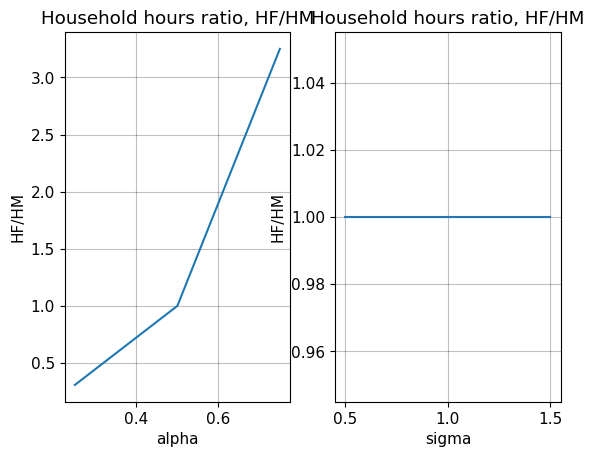

In [15]:
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 11})

ratio_alpha = [a/b for a, b in zip(HF_alpha_vec, HM_alpha_vec)]
ratio_sigma = [a/b for a, b in zip(HF_sigma_vec, HM_sigma_vec)]

def plot_alpha_sigma():
    # a. create the figure
    fig = plt.figure()

    # b. plot for alpha
    ax = fig.add_subplot(1,2,1)

    ax.plot(alphas,ratio_alpha)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'alpha')
    ax.set_ylabel(f'HF/HM')

    # c. plot for sigma
    ax = fig.add_subplot(1,2,2,)

    ax.plot(sigmas,ratio_sigma)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'sigma')
    ax.set_ylabel(f'HF/HM')


plot_alpha_sigma()  
#print(HM_vec,HF_vec)


# Question 2

We now use our discrete way of solving the model to solve for different wage levels for the female of the household.

**BLOCK 1:** Solves the model for given wage levels

**BLOCK 2:** Plots the result of the model for different wage levels

In [22]:
#code for solving the model
solution_wage = []

HM_wage_vec = ()
HF_wage_vec = ()
wF = (0.8, 0.9, 1.0, 1.1, 1.2)


# b. for loop
for wages in wF:
    func = HouseholdOptimizationClass()
    func.par.wF = wages
    solution_wage.append(func.solve_discrete())
    
#c. extracting results
HF_wage_vec = [ns.HF for ns in solution_wage]
HM_wage_vec = [ns.HM for ns in solution_wage]

ratio_H = [np.log(a/b) for a, b in zip(HF_wage_vec, HM_wage_vec)]
ratio_w = np.log(wF)

#ratio_wage = np.log[HF_wage_vec/HM_wage_vec]
print(ratio_H)
print(ratio_w)

[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


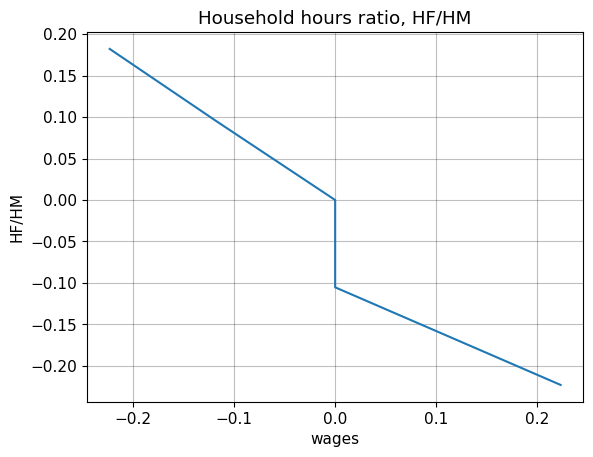

In [25]:
#code for plotting the results
def plot_wages():
    # a. create the figure
    fig = plt.figure()

    # b. plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(ratio_H,ratio_w)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'wages')
    ax.set_ylabel(f'HF/HM')

plot_wages()

# Question 3

Solving the model continuously using the minimize function of optimize in our class.

**BLOCK 1:** Solves the model for given wage levels

**BLOCK 2:** Plots the result of HF/HM as well as wF/wM against the different values of wF.

In [ ]:
# solving the model
func = HouseholdOptimizationClass() #resetting the parameters
result_cont = func.solve_cont()
print(result_cont)


#another soultion:
#LM, LF, HM, HF = func.solve_cont()
#print( LM, LF, HM, HF)


(4.454021832531091, 4.4540218254339115, 4.454021832531091, 4.4540218254339115)


In [ ]:
#plotting the results

# Question 4

Now we find alpha and sigma that targets the parameter estimates of the article. 

**BLOCK 1:** Solving the model.

**BLOCK 2:** Illustrating the results.

# Question 5

Implementing an extension to the model: 
Can it match the data when alpha = 0.5?

ADD ECONOMIC INTERPRETATION